In [23]:
import pandas as pd
over = pd.read_csv('over_lines.csv')
results = pd.read_csv('data/pitching_result_2024.csv')
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
over

,Unnamed: 0,Market Name,Outcome,Bet Price,Player Name,PlayerId,Name_x,Team,ATC_ERA,Depth_Charts_ERA,...,% Rostered,IP_y,W_y,SV_y,K_y,ERA_y,WHIP_y,yahoo_diff,mean_era_2,mean_diff_2
0,0,Arizona Diamondbacks - Zac Gallen ERA,Over 3.35,-125,Zac Gallen,19291,Zac Gallen,ARI,3.64813,3.70050,...,98%,187.0,13.0,0.0,197.0,3.27,1.06,-0.08,3.606737,0.373432
1,1,Atlanta Braves - Spencer Strider ERA,Over 3.05,-115,Spencer Strider,27498,Spencer Strider,ATL,3.38062,3.23170,...,99%,193.0,16.0,0.0,270.0,3.40,1.06,0.35,3.291196,0.207674
2,2,Baltimore Orioles - Corbin Burnes ERA,Over 3.30,-125,Corbin Burnes,19361,Corbin Burnes,BAL,3.51893,3.52049,...,99%,192.0,13.0,0.0,220.0,2.95,1.00,-0.35,3.434884,0.252838
3,3,Baltimore Orioles - Grayson Rodriguez ERA,Over 3.55,-120,Grayson Rodriguez,24492,Grayson Rodriguez,BAL,3.72286,3.82250,...,96%,147.0,12.0,0.0,160.0,3.61,1.18,0.06,3.760299,0.264418
4,4,Cincinnati Reds - Hunter Greene ERA,Over 3.85,-120,Hunter Greene,22182,Hunter Greene,CIN,4.24071,4.27815,...,84%,144.0,9.0,0.0,187.0,4.31,1.28,0.46,4.319893,0.491850
5,5,Houston Astros - Framber Valdez ERA,Over 3.25,-115,Framber Valdez,17295,Framber Valdez,HOU,3.39654,3.36596,...,97%,189.0,14.0,0.0,186.0,3.19,1.15,-0.06,3.399263,0.176968
6,6,Kansas City Royals - Cole Ragans ERA,Over 3.65,-115,Cole Ragans,21846,Cole Ragans,KCR,3.88306,3.98169,...,87%,143.0,8.0,0.0,157.0,3.78,1.20,0.13,3.940969,0.345356
7,7,Los Angeles Dodgers - Tyler Glasnow ERA,Over 3.40,-105,Tyler Glasnow,14374,Tyler Glasnow,LAD,3.47411,3.52641,...,98%,139.0,11.0,0.0,181.0,3.37,1.09,-0.03,3.498253,0.163554
8,8,Los Angeles Dodgers - Yoshinobu Yamamoto ERA,Over 3.40,-115,Yoshinobu Yamamoto,sa3023345,Yoshinobu Yamamoto,LAD,3.73031,3.74425,...,90%,172.0,12.0,0.0,205.0,3.14,1.12,-0.26,3.714764,0.484670
9,9,Miami Marlins - Jesús Luzardo ERA,Over 3.55,-125,Jesús Luzardo,19959,Jesús Luzardo,MIA,3.76306,3.81199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.850444,0.300444


In [16]:
results[['Name', "ERA"]]

,Name,ERA
0,Cole Ragans,3.14
1,Tyler Glasnow,3.49
2,Hunter Greene,2.75
3,Corbin Burnes,2.92
4,Framber Valdez,2.91
5,Zac Gallen,3.65
6,Yoshinobu Yamamoto,3.00
7,Grayson Rodriguez,3.86
8,Jesús Luzardo,5.00
9,Spencer Strider,7.00


In [34]:
post_over = pd.merge(over, results[['Name', 'ERA']], left_on = 'Player Name', right_on='Name', suffixes= ('_pre','_post'))
post_over['era_residual'] = post_over['ERA_post'] - post_over["Over_Value"]
post_over['era_residual_proj'] =  post_over['ERA_post'] - post_over["ATC_ERA"]

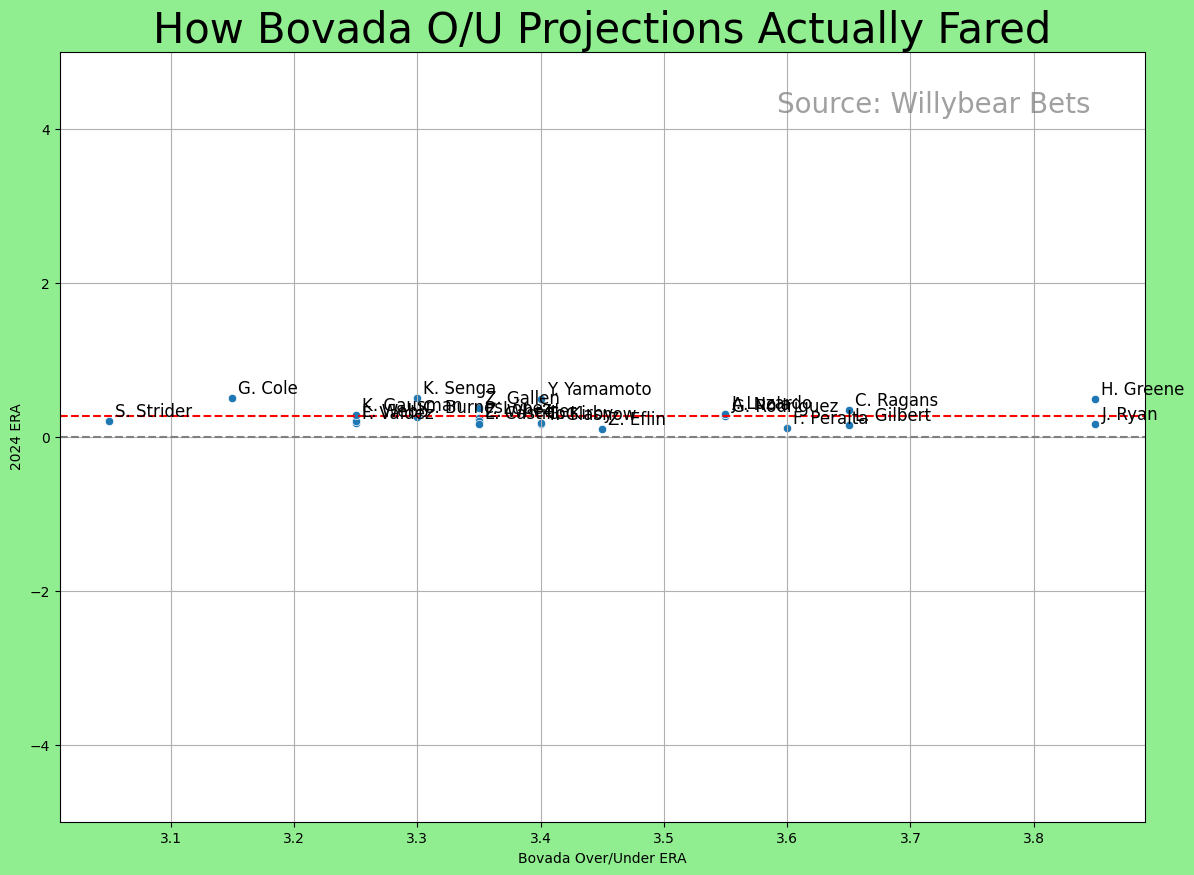

In [58]:
# Adjusting the plot to be horizontal for better visualization of differentials
plt.figure(figsize=(14, 10), facecolor='lightgreen')
sns.scatterplot(data=post_over, y='Difference', x='Over_Value')
plt.title('How Bovada O/U Projections Actually Fared', fontsize = 30)
plt.ylabel("2024 ERA")
plt.xlabel('Bovada Over/Under ERA')
plt.ylim(-5, 5)
plt.axhline(0, color='grey', ls='--')  # Adding a horizontal reference line at y=0
plt.axhline(post_over['Difference'].mean(), color='red', ls='--')  # Adding a horizontal reference line at y=0

plt.grid(True)
plt.text(0.95, 0.95, "Source: Willybear Bets", transform=plt.gca().transAxes,
         ha='right', va='top', fontsize=20, color='gray', alpha=0.75)
# Annotating each point with the player's shortened name
for index, row in post_over.iterrows():
    plt.text(row['Over_Value'] + .005, row['Difference'] +.005, row['Shortened_Name'], verticalalignment='bottom', size='large', color='black')

plt.show()

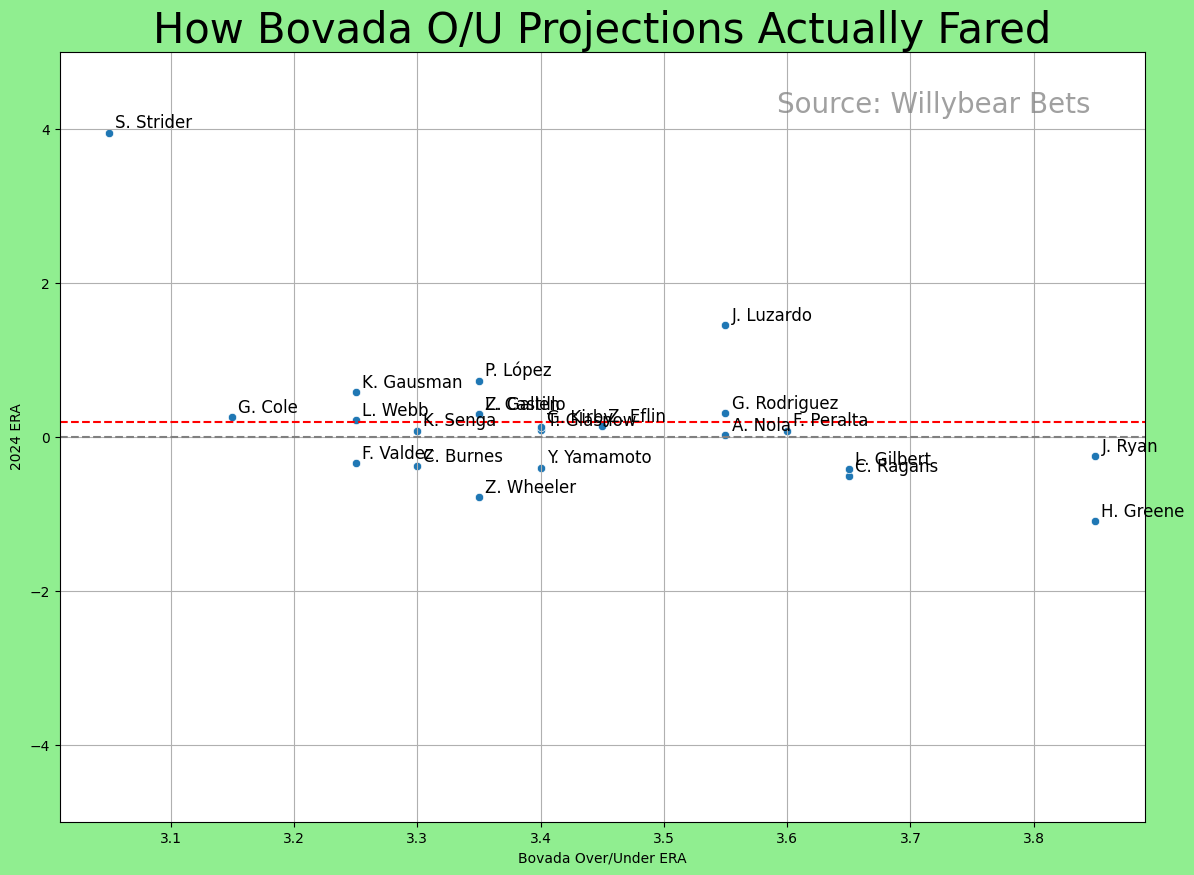

In [53]:
# Adjusting the plot to be horizontal for better visualization of differentials
plt.figure(figsize=(14, 10), facecolor='lightgreen')
sns.scatterplot(data=post_over, y='era_residual', x='Over_Value')
plt.title('How Bovada O/U Projections Actually Fared', fontsize = 30)
plt.ylabel("2024 ERA")
plt.xlabel('Bovada Over/Under ERA')
plt.ylim(-5, 5)
plt.axhline(0, color='grey', ls='--')  # Adding a horizontal reference line at y=0
plt.axhline(post_over['era_residual'].mean(), color='red', ls='--')  # Adding a horizontal reference line at y=0

plt.grid(True)
plt.text(0.95, 0.95, "Source: Willybear Bets", transform=plt.gca().transAxes,
         ha='right', va='top', fontsize=20, color='gray', alpha=0.75)
# Annotating each point with the player's shortened name
for index, row in post_over.iterrows():
    plt.text(row['Over_Value'] + .005, row['era_residual'] +.005, row['Shortened_Name'], verticalalignment='bottom', size='large', color='black')

plt.show()

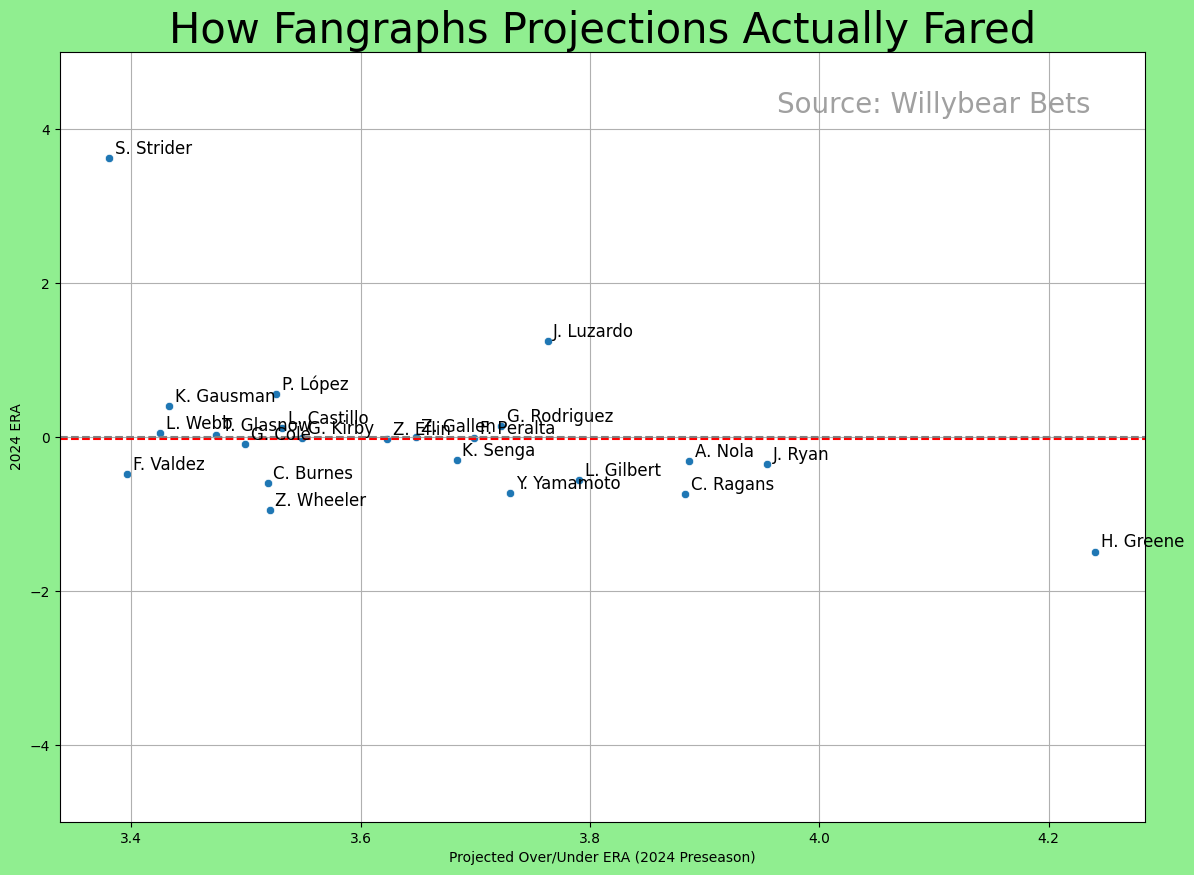

In [51]:
# Adjusting the plot to be horizontal for better visualization of differentials
plt.figure(figsize=(14, 10), facecolor='lightgreen')
sns.scatterplot(data=post_over, y='era_residual_proj', x='ATC_ERA')
plt.title('How Fangraphs Projections Actually Fared', fontsize = 30)
plt.ylabel("2024 ERA")
plt.xlabel('Projected Over/Under ERA (2024 Preseason)')
plt.ylim(-5, 5)
plt.axhline(0, color='grey', ls='--')  # Adding a horizontal reference line at y=0
plt.axhline(post_over['era_residual_proj'].mean(), color='red', ls='--')  # Adding a horizontal reference line at y=0
plt.grid(True)
plt.text(0.95, 0.95, "Source: Willybear Bets", transform=plt.gca().transAxes,
         ha='right', va='top', fontsize=20, color='gray', alpha=0.75)
# Annotating each point with the player's shortened name
for index, row in post_over.iterrows():
    plt.text(row['ATC_ERA'] + .005, row['era_residual_proj'] +.005, row['Shortened_Name'], verticalalignment='bottom', size='large', color='black')

plt.show()

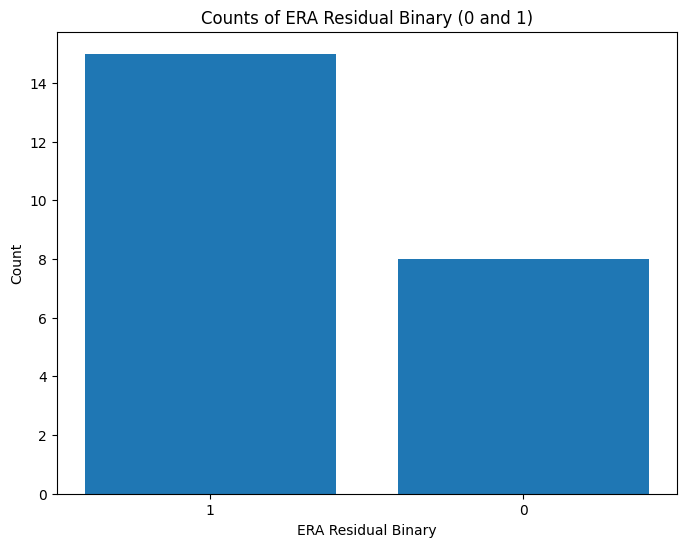

In [39]:
# Create binary variable based on era_residual
post_over['era_residual_binary'] = post_over['era_residual'].apply(lambda x: 1 if x > 0 else 0)

# Count the number of 0's and 1's
count_data = post_over['era_residual_binary'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(count_data.index.astype(str), count_data.values)
plt.xlabel("ERA Residual Binary")
plt.ylabel("Count")
plt.title("Counts of ERA Residual Binary (0 and 1)")
plt.show()

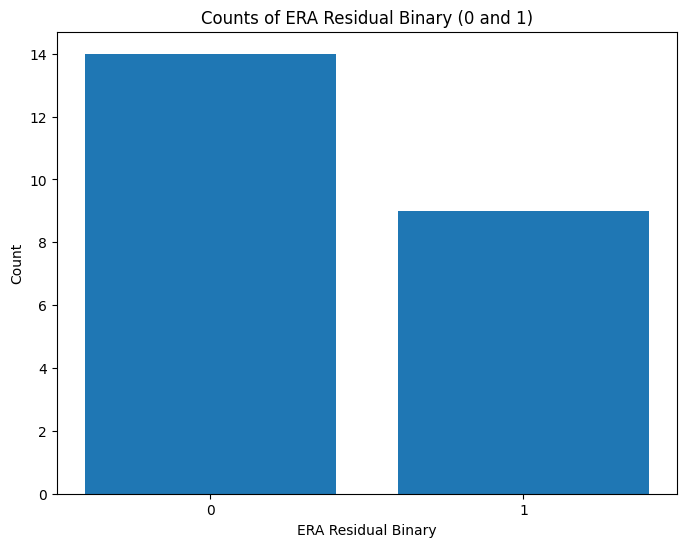

In [43]:
# Create binary variable based on era_residual
post_over['era_residual_binary'] = post_over['era_residual_proj'].apply(lambda x: 1 if x > 0 else 0)

# Count the number of 0's and 1's
count_data = post_over['era_residual_binary'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(count_data.index.astype(str), count_data.values)
plt.xlabel("ERA Residual Binary")
plt.ylabel("Count")
plt.title("Counts of ERA Residual Binary (0 and 1)")
plt.show()

In [56]:
post_over['Difference'].mean()

0.26815799999999995

In [44]:
post_over['era_residual'].mean()

0.19347826086956527

In [45]:
post_over['era_residual_proj'].mean()

-0.025279565217391272

In [55]:
post_over['Bet Price']



0    -125
1    -115
2    -125
3    -120
4    -120
5    -115
6    -115
7    -105
8    -115
9    -125
10   -115
11   -115
12   -115
13   -125
14   -125
15   -115
16   -115
17   -115
18   -115
19   -115
20   -115
21   -115
22   -115
Name: Bet Price, dtype: int64